# IOH O2

# 0.1 Import Package

In [ ]:
#Import Package
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import klib
import plotly.express as px
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
import lazypredict

# 0.2 Upload Data

In [ ]:
#Import Data
df=pd.read_excel("Sales Analytics Improvements.xlsx")
df

In [4]:
df.columns

Index(['Full Name', 'NIK', 'Sales Status', 'JobTitle', 'Job Title Cat',
       'Chief Cat', 'Chief', 'Work Loc Category', 'EJBN Cluster',
       'WorkLocCategory', 'Gender - Cat', 'Gender', 'Marital Status',
       'Marriage', 'Age', 'CR', 'YoG', 'Promosi', 'Mutasi', 'YoS', 'BoxY1',
       'BoxY', 'IPMY2', 'IPMY1', 'IPMY', 'Engagements', 'Certification',
       'Learning Hour', 'Satisfaction Score', 'Function Fit', 'Achievements',
       'Achv Norm', 'Achievements Category', 'Achv Category Norm'],
      dtype='object')

In [5]:
# df=df[df['Work Loc Category'] == 'East Java Bali Nusra']
# df=df[df['EJBN Cluster'] == 'Nusa Tenggara']
# df

In [6]:
#Checking Data Features
df.columns



Index(['Full Name', 'NIK', 'Sales Status', 'JobTitle', 'Job Title Cat',
       'Chief Cat', 'Chief', 'Work Loc Category', 'EJBN Cluster',
       'WorkLocCategory', 'Gender - Cat', 'Gender', 'Marital Status',
       'Marriage', 'Age', 'CR', 'YoG', 'Promosi', 'Mutasi', 'YoS', 'BoxY1',
       'BoxY', 'IPMY2', 'IPMY1', 'IPMY', 'Engagements', 'Certification',
       'Learning Hour', 'Satisfaction Score', 'Function Fit', 'Achievements',
       'Achv Norm', 'Achievements Category', 'Achv Category Norm'],
      dtype='object')

In [7]:
#Checking Data Properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Full Name              731 non-null    object 
 1   NIK                    731 non-null    int64  
 2   Sales Status           731 non-null    object 
 3   JobTitle               731 non-null    int64  
 4   Job Title Cat          731 non-null    object 
 5   Chief Cat              731 non-null    object 
 6   Chief                  731 non-null    int64  
 7   Work Loc Category      731 non-null    object 
 8   EJBN Cluster           143 non-null    object 
 9   WorkLocCategory        731 non-null    int64  
 10  Gender - Cat           731 non-null    object 
 11  Gender                 731 non-null    int64  
 12  Marital Status         731 non-null    object 
 13  Marriage               731 non-null    int64  
 14  Age                    731 non-null    float64
 15  CR    

In [8]:
#Selecting Data Features
data=df[['JobTitle', 
      'Chief', 'WorkLocCategory',
       'Gender',  'Marriage', 'Age', 'CR',
       'YoG', 'Promosi', 'Mutasi', 'YoS', 'BoxY1', 'BoxY', 'IPMY2',
       'IPMY1', 'IPMY', 'Engagements', 'Certification', 'Learning Hour',
       'Satisfaction Score', 'Function Fit',
       'Achievements Category'
]]
data.dtypes



JobTitle                   int64
Chief                      int64
WorkLocCategory            int64
Gender                     int64
Marriage                   int64
Age                      float64
CR                       float64
YoG                      float64
Promosi                    int64
Mutasi                     int64
YoS                      float64
BoxY1                      int64
BoxY                       int64
IPMY2                      int64
IPMY1                      int64
IPMY                       int64
Engagements                int64
Certification              int64
Learning Hour              int64
Satisfaction Score         int64
Function Fit               int64
Achievements Category      int64
dtype: object

In [9]:

#Cleaning data from Null/NA
data=data.dropna()
data.isna().sum()



JobTitle                 0
Chief                    0
WorkLocCategory          0
Gender                   0
Marriage                 0
Age                      0
CR                       0
YoG                      0
Promosi                  0
Mutasi                   0
YoS                      0
BoxY1                    0
BoxY                     0
IPMY2                    0
IPMY1                    0
IPMY                     0
Engagements              0
Certification            0
Learning Hour            0
Satisfaction Score       0
Function Fit             0
Achievements Category    0
dtype: int64

In [10]:
#Data Shape
data.shape



(731, 22)

In [11]:
#Checking Data
data

JobTitle  Chief  WorkLocCategory  Gender  Marriage        Age        CR  \
0           1      2                2       1         2  31.375342  0.853016   
1           1      2                5       1         1  34.909589  0.759324   
2           1      2                2       1         2  27.605479  0.873400   
3           1      2                6       1         2  39.991781  1.021911   
4           1      2                5       1         2  31.145205  0.763985   
..        ...    ...              ...     ...       ...        ...       ...   
726         1      2                2       1         1  37.660274  0.685558   
727         1      2                2       1         2  30.660274  0.553789   
728         2      2                1       1         2  43.413699  0.920675   
729         1      2                4       1         1  27.641096  0.722763   
730         1      2                4       1         2  27.994521  0.844492   

          YoG  Promosi  Mutasi  ...  BoxY  IPMY2  IPMY1  IPMY  Engagements  \
0    3.913242        0       1  ...     0      4      4     3           10   
1    3.163242        0       2  ...     0      4      3     3           10   
2    2.579909        0       2  ...     0      4      3     3           10   
3    4.496575        1       3  ...     0      3      3     3           10   
4    2.663242        0       3  ...     0      3      3     3           10   
..        ...      ...     ...  ...   ...    ...    ...   ...          ...   
726  0.123288        0       0  ...     0      0      0     0            0   
727  1.579909        0       0  ...     0      0      0     4            0   
728  0.109589        0       0  ...     0      0      0     0            0   
729  0.246575        0       0  ...     0      0      0     0            0   
730  0.167123        0       0  ...     0      0      0     0            0   

     Certification  Learning Hour  Satisfaction Score  Function Fit  \
0                3             21                  32            76   
1                0             11                  33            73   
2                0             14                  30            76   
3               41             15                  31            71   
4                0             13                  34            70   
..             ...            ...                 ...           ...   
726              0              0                   0             0   
727              0              5                  23            40   
728              0              0                   0             0   
729              0              0                   0             0   
730              0              0                   0             0   

     Achievements Category  
0                        1  
1                        0  
2                        0  
3                        1  
4                        0  
..                     ...  
726                      1  
727                      0  
728                      1  
729                      1  
730                      1  

[731 rows x 22 columns]

In [12]:
data['Achievements Category'].value_counts()

1    467
0    264
Name: Achievements Category, dtype: int64

# 0.3 Data Summary

In [13]:
data.describe().T

count       mean        std        min        25%  \
JobTitle               731.0   1.283174   0.541918   1.000000   1.000000   
Chief                  731.0   2.694938   1.516562   2.000000   2.000000   
WorkLocCategory        731.0   3.389877   1.895881   1.000000   1.500000   
Gender                 731.0   1.157319   0.364350   1.000000   1.000000   
Marriage               731.0   1.931601   0.319632   1.000000   2.000000   
Age                    731.0  40.618316   7.022125  23.446575  35.150685   
CR                     731.0   0.848809   0.204154   0.325402   0.708082   
YoG                    731.0   4.868637   4.132302   0.000000   1.829909   
Promosi                731.0   0.622435   0.919940   0.000000   0.000000   
Mutasi                 731.0   1.974008   2.072820   0.000000   0.000000   
YoS                    731.0  10.892349   7.691565   0.167123   4.104110   
BoxY1                  731.0   0.132695   0.339477   0.000000   0.000000   
BoxY                   731.0   0.218878   0.413769   0.000000   0.000000   
IPMY2                  731.0   3.203830   1.181263   0.000000   3.000000   
IPMY1                  731.0   3.073871   1.356875   0.000000   3.000000   
IPMY                   731.0   3.369357   0.890031   0.000000   3.000000   
Engagements            731.0   5.358413   4.507543   0.000000   0.000000   
Certification          731.0  12.455540  15.807372   0.000000   0.000000   
Learning Hour          731.0   8.336525   6.647609   0.000000   3.000000   
Satisfaction Score     731.0  27.060192   8.002684   0.000000  24.000000   
Function Fit           731.0  62.755130  18.046256   0.000000  57.000000   
Achievements Category  731.0   0.638851   0.480663   0.000000   0.000000   

                             50%        75%        max  
JobTitle                1.000000   1.000000   3.000000  
Chief                   2.000000   2.000000   6.000000  
WorkLocCategory         4.000000   5.000000   6.000000  
Gender                  1.000000   1.000000   2.000000  
Marriage                2.000000   2.000000   3.000000  
Age                    40.323288  46.127397  56.021918  
CR                      0.879538   0.990712   1.447542  
YoG                     3.413242   7.579909  19.996575  
Promosi                 0.000000   1.000000   5.000000  
Mutasi                  1.000000   3.000000  10.000000  
YoS                     9.254795  16.190411  29.126027  
BoxY1                   0.000000   0.000000   1.000000  
BoxY                    0.000000   0.000000   1.000000  
IPMY2                   3.000000   4.000000   5.000000  
IPMY1                   3.000000   4.000000   5.000000  
IPMY                    3.000000   4.000000   5.000000  
Engagements             8.000000  10.000000  10.000000  
Certification           5.000000  23.500000  79.000000  
Learning Hour           7.000000  14.000000  23.000000  
Satisfaction Score     29.000000  32.000000  36.000000  
Function Fit           70.000000  74.000000  87.000000  
Achievements Category   1.000000   1.000000   1.000000

In [14]:
#Data Separating
X=data.drop('Achievements Category',axis=1)
y=data['Achievements Category']

In [15]:
#Balancing
over=SMOTE()
X_res, y_res = over.fit_resample(X,y)

In [16]:
y_res.value_counts()

1    467
0    467
Name: Achievements Category, dtype: int64

In [17]:
X_res.isna().sum()


JobTitle              0
Chief                 0
WorkLocCategory       0
Gender                0
Marriage              0
Age                   0
CR                    0
YoG                   0
Promosi               0
Mutasi                0
YoS                   0
BoxY1                 0
BoxY                  0
IPMY2                 0
IPMY1                 0
IPMY                  0
Engagements           0
Certification         0
Learning Hour         0
Satisfaction Score    0
Function Fit          0
dtype: int64

In [18]:
#Categorization
X_res['JobTitle']=X_res['JobTitle'].astype('category')
X_res['Chief']=X_res['Chief'].astype('category')
X_res['WorkLocCategory']=X_res['WorkLocCategory'].astype('category')
X_res['Gender']=X_res['Gender'].astype('category')
X_res['Marriage']=X_res['Marriage'].astype('category')
X_res.dtypes

JobTitle              category
Chief                 category
WorkLocCategory       category
Gender                category
Marriage              category
Age                    float64
CR                     float64
YoG                    float64
Promosi                  int64
Mutasi                   int64
YoS                    float64
BoxY1                    int64
BoxY                     int64
IPMY2                    int64
IPMY1                    int64
IPMY                     int64
Engagements              int64
Certification            int64
Learning Hour            int64
Satisfaction Score       int64
Function Fit             int64
dtype: object

# 1.4 Data Splitting

In [19]:
#Data Splitting
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=1)



In [20]:
X_train.dtypes

JobTitle                int64
Chief                   int64
WorkLocCategory         int64
Gender                  int64
Marriage                int64
Age                   float64
CR                    float64
YoG                   float64
Promosi                 int64
Mutasi                  int64
YoS                   float64
BoxY1                   int64
BoxY                    int64
IPMY2                   int64
IPMY1                   int64
IPMY                    int64
Engagements             int64
Certification           int64
Learning Hour           int64
Satisfaction Score      int64
Function Fit            int64
dtype: object

# 2. Modelling

In [21]:
#Modelling using Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
modelRF=RandomForestClassifier(random_state= 42,max_depth=20,max_features="sqrt",min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
modelRF.fit(X_train,y_train)



RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [22]:
#Predict with X_test
# y_pred=model.predict(X_test)
# y_pred

y_pred = pd.DataFrame(modelRF.predict(X_test),columns=['pred'], index=X_test.index)
y_pred.head()

pred
404     1
726     1
159     1
422     0
512     1

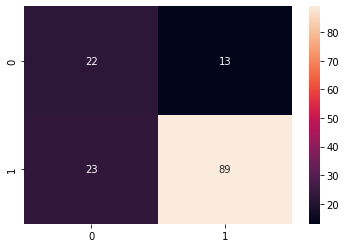

In [23]:
#Print Confusion Matrix
_=sns.heatmap(confusion_matrix(y_pred,y_test),fmt='g',annot=True)

In [24]:
#Print Accuracy Score
print("Accuracy Score", accuracy_score(y_pred,y_test))

Accuracy Score 0.7551020408163265


In [25]:
# from shapash import SmartExplainer
# xpl = SmartExplainer(model=modelRF)
# xpl.compile(x=X,y_pred=y)

In [26]:
# app = xpl.run_app(title_story='Sales')

In [27]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200,1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=modelRF, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score:.2f}")

# Evaluate the best model on the test set
best_rf_classifier = grid_search.best_estimator_
test_accuracy = best_rf_classifier.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.72
Test Accuracy: 0.76


In [28]:

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Load your dataset here (replace this with loading your own dataset)
data = data
#Data Separating
X=data.drop('Achievements Category',axis=1)
y=data['Achievements Category']


# Create a Random Forest classifier (or any other classifier of your choice)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Specify the number of features to select (adjust as needed)
num_features_to_select = 10

# Create the RFE model
rfe = RFE(estimator=classifier, n_features_to_select=num_features_to_select)

# Fit RFE to your data
rfe.fit(X, y)

feature_ranking = rfe.ranking_

# Print the selected features and their rankings
print("Selected Features:")
for feature_name, ranking in zip(data.columns, feature_ranking):
    print(f"Feature: {feature_name}, Ranking: {ranking}")


Selected Features:
Feature: JobTitle, Ranking: 8
Feature: Chief, Ranking: 7
Feature: WorkLocCategory, Ranking: 1
Feature: Gender, Ranking: 10
Feature: Marriage, Ranking: 12
Feature: Age, Ranking: 1
Feature: CR, Ranking: 1
Feature: YoG, Ranking: 1
Feature: Promosi, Ranking: 9
Feature: Mutasi, Ranking: 5
Feature: YoS, Ranking: 1
Feature: BoxY1, Ranking: 11
Feature: BoxY, Ranking: 6
Feature: IPMY2, Ranking: 4
Feature: IPMY1, Ranking: 2
Feature: IPMY, Ranking: 1
Feature: Engagements, Ranking: 3
Feature: Certification, Ranking: 1
Feature: Learning Hour, Ranking: 1
Feature: Satisfaction Score, Ranking: 1
Feature: Function Fit, Ranking: 1


# Extracting Features Importance

In [29]:
#Print Feature Important
FI=pd.DataFrame(modelRF.feature_importances_)
Features=pd.DataFrame(X_train.columns)
Features['FI Scores']=FI
Features



0  FI Scores
0             JobTitle   0.014754
1                Chief   0.014015
2      WorkLocCategory   0.075014
3               Gender   0.013680
4             Marriage   0.011210
5                  Age   0.084663
6                   CR   0.100061
7                  YoG   0.073697
8              Promosi   0.019565
9               Mutasi   0.039429
10                 YoS   0.079927
11               BoxY1   0.009240
12                BoxY   0.021291
13               IPMY2   0.040178
14               IPMY1   0.039964
15                IPMY   0.054435
16         Engagements   0.053900
17       Certification   0.052191
18       Learning Hour   0.061584
19  Satisfaction Score   0.065672
20        Function Fit   0.075530

In [30]:
#Sort Feature Important
Features = Features.sort_values(by='FI Scores',ascending=False)
Features['FI Scores %']=round(Features['FI Scores'],4)*100
Features

0  FI Scores  FI Scores %
6                   CR   0.100061        10.01
5                  Age   0.084663         8.47
10                 YoS   0.079927         7.99
20        Function Fit   0.075530         7.55
2      WorkLocCategory   0.075014         7.50
7                  YoG   0.073697         7.37
19  Satisfaction Score   0.065672         6.57
18       Learning Hour   0.061584         6.16
15                IPMY   0.054435         5.44
16         Engagements   0.053900         5.39
17       Certification   0.052191         5.22
13               IPMY2   0.040178         4.02
14               IPMY1   0.039964         4.00
9               Mutasi   0.039429         3.94
12                BoxY   0.021291         2.13
8              Promosi   0.019565         1.96
0             JobTitle   0.014754         1.48
1                Chief   0.014015         1.40
3               Gender   0.013680         1.37
4             Marriage   0.011210         1.12
11               BoxY1   0.009240         0.92

In [31]:
#Hist the FI
fig = px.bar(Features, x=0, y='FI Scores %',text_auto=True)
fig.show()



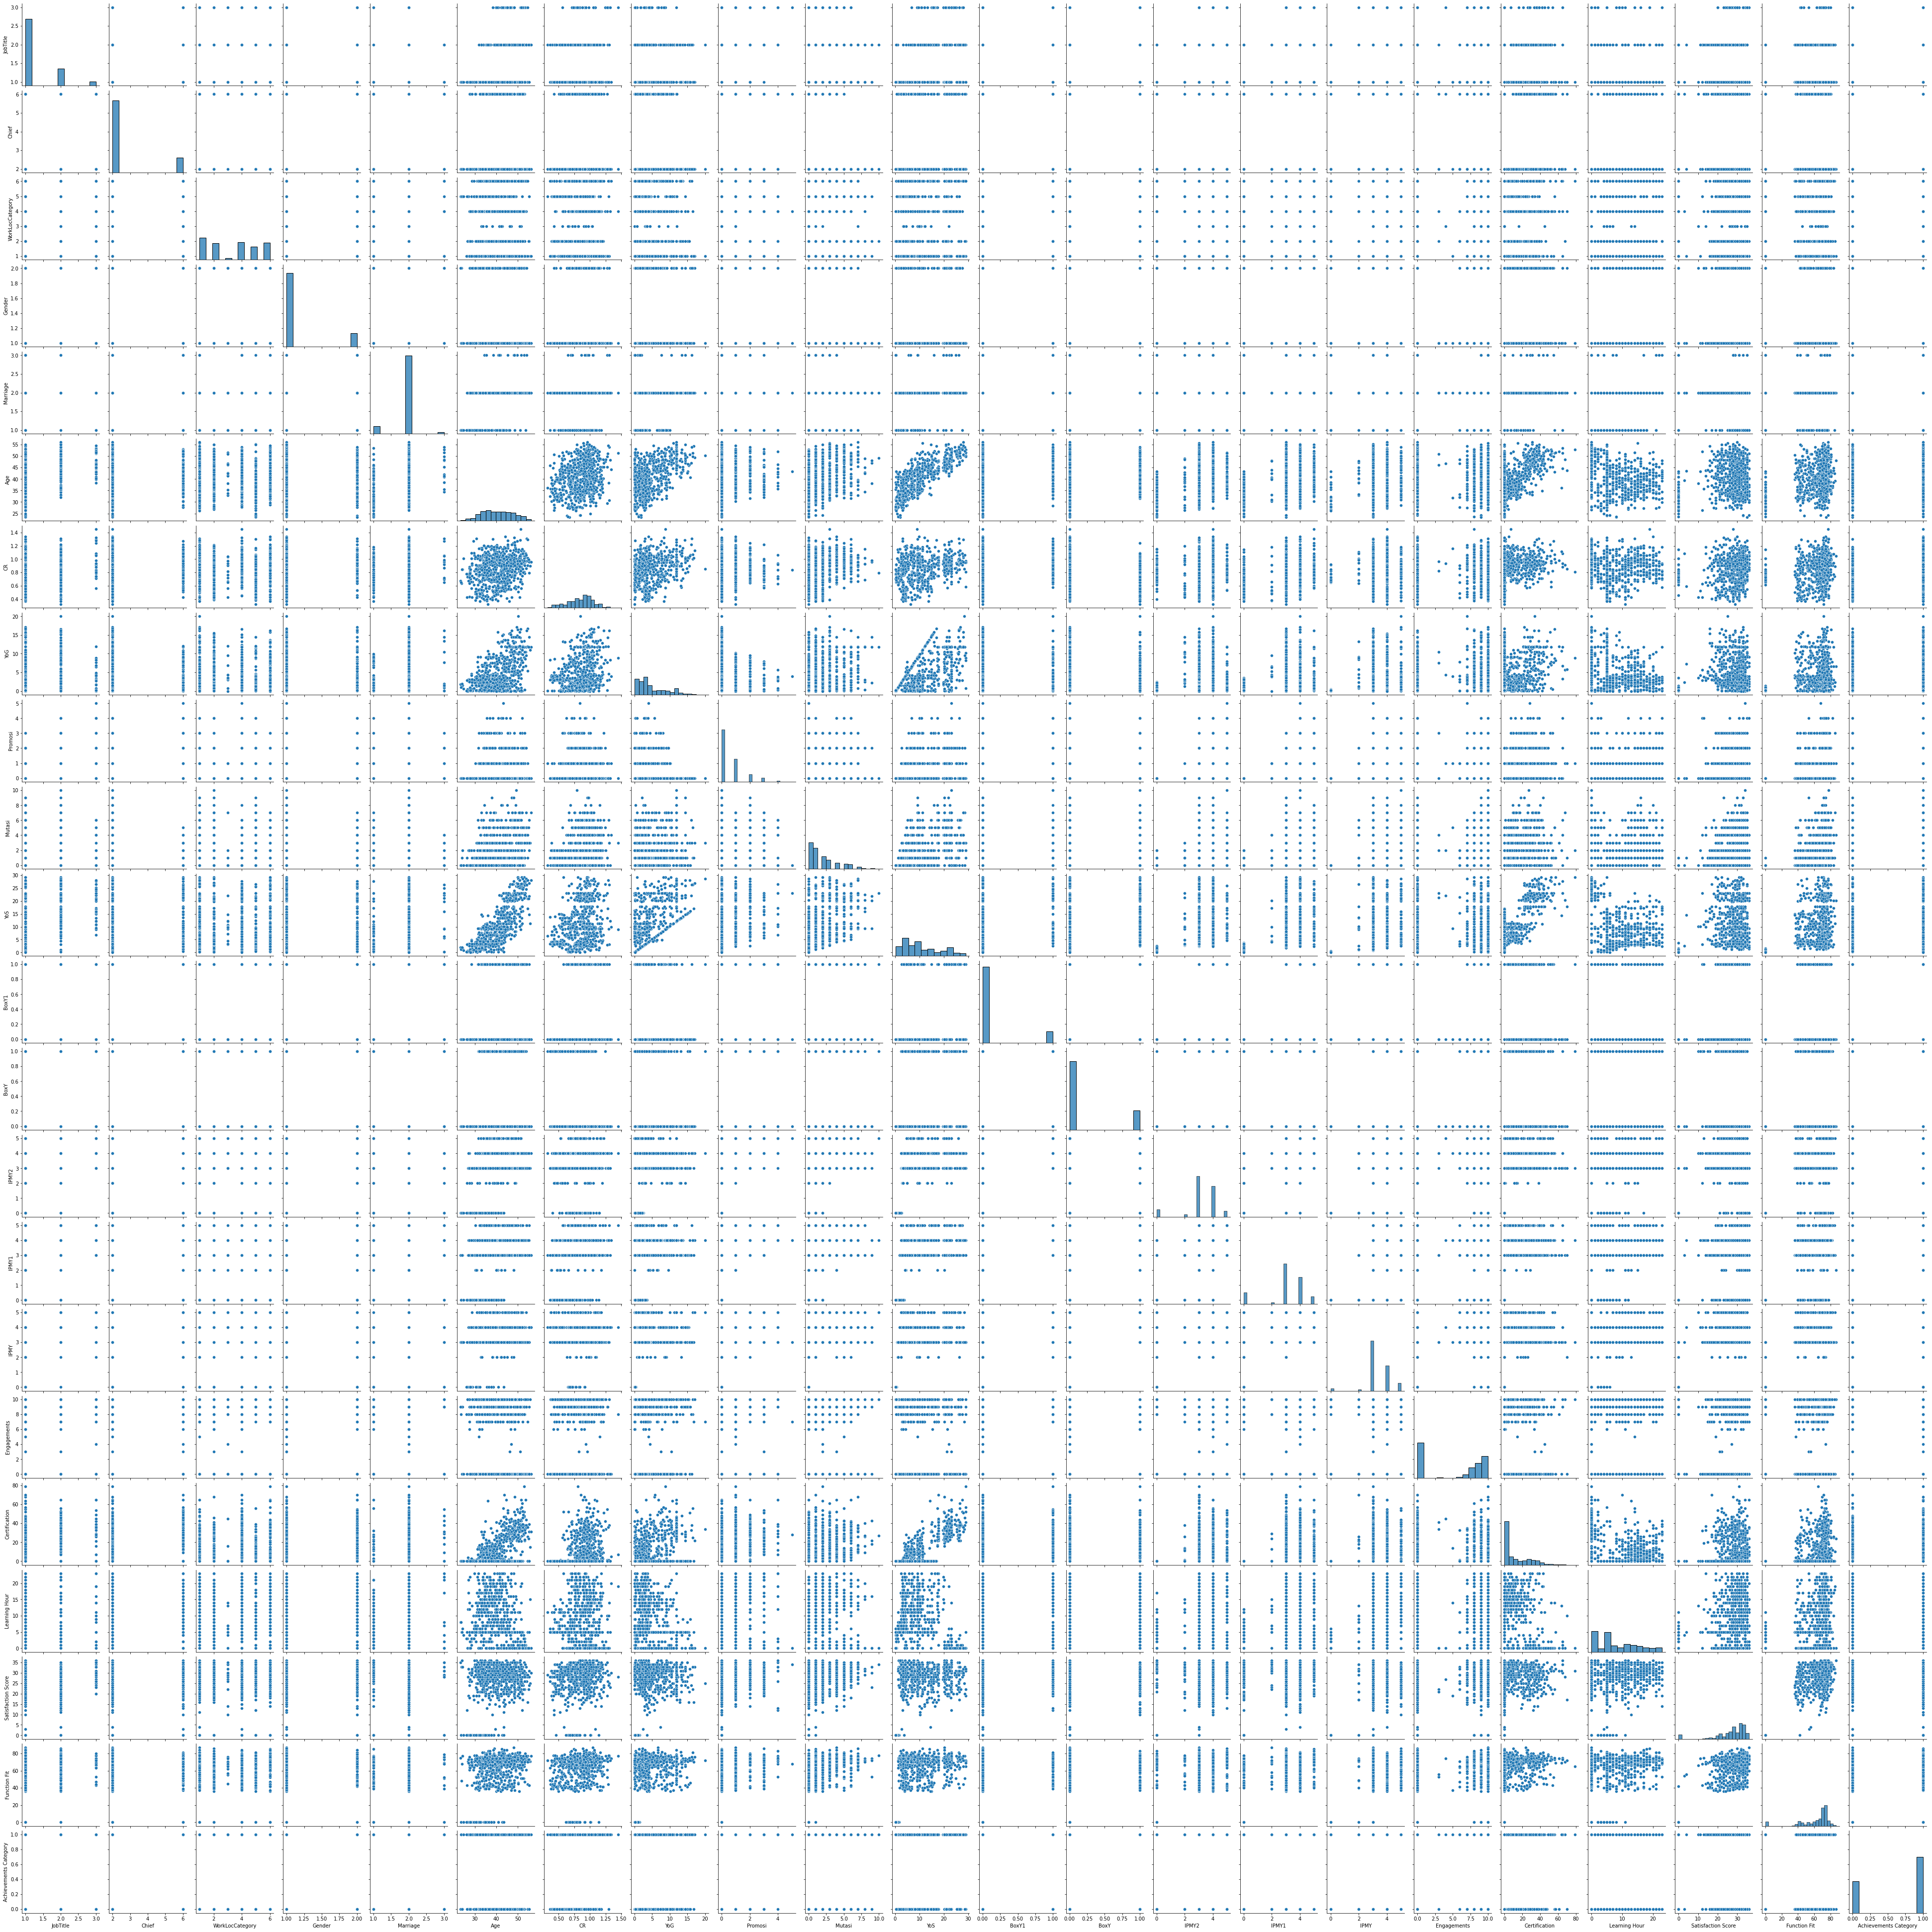

In [32]:
import seaborn as sns
_=sns.pairplot(data)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard.datasets import titanic_survive, titanic_names

ExplainerDashboard(ClassifierExplainer(modelRF, X_test)).run()

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
No y labels were passed to the Explainer, so setting model_summary=False...
Generating layout...
Calculating shap values...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating prediction probabilities...
Calculating ShadowDecTree for each individual deci

 * Running on all addresses.
 * Running on http://10.10.178.29:8050/ (Press CTRL+C to quit)
10.10.178.29 - - [14/Nov/2023 10:26:42] "GET / HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:42] "GET /assets/bootstrap.min.css?m=1656166080.6030521 HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:42] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_5_1m1655691032.12.1.min.js HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:42] "GET /_dash-component-suites/dash/deps/react@16.v2_5_1m1655691032.14.0.min.js HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:42] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_5_1m1655691032.14.0.min.js HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:42] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_5_1m1655691032.8.1.min.js HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:42] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v1_1_0m1656166080.min.js HTTP/1.1" 200 -
10.10.178.29 - - 

Calculating pred_percentiles...


10.10.178.29 - - [14/Nov/2023 10:26:43] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:43] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:43] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:43] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:43] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:43] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:43] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:43] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:43] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:43] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:43] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:43] "POST /_dash-u

pos_label should either be int or str in self.labels!


10.10.178.29 - - [14/Nov/2023 10:26:45] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:45] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:45] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:46] "POST /_dash-update-component HTTP/1.1" 200 -


pos_label should either be int or str in self.labels!


10.10.178.29 - - [14/Nov/2023 10:26:46] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:46] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:46] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:46] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:46] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:26:47] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:27:56] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:27:56] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:27:56] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:27:56] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 10:27:56] "POST /_dash-update-component HTTP/1.1" 200 -
10.10.178.29 - - [14/Nov/2023 

# Testing with New Data

# Data Preparing

In [ ]:
df_test_ori=pd.read_excel("IOH Sales.xlsx")
df_test_ori

In [ ]:
df_test_ori.columns

In [ ]:
#Select feature for testing
df_test=df_test_ori[['Job.Title', 
                     #'Chief',
       'Work.Loc.Category', 'Gender', 'Marriage', 'Age', 'CR','YoG',
       'Promosi', 'Mutasi', 'YoS', 'Box.Y.1', 'Box.Y', 'IPM.Y.2',
       'IPM.Y.1', 'IPM.Y']]

# Data Scalling

In [ ]:
df_test_scalling=df_test[[
       'Promosi', 'Mutasi', 'IPM.Y.2',
       'IPM.Y.1', 'IPM.Y',
                          'Box.Y.1',
                          'Box.Y'
                         ]]

In [ ]:
#Scalling Data
df_test_scalled=scaller.transform(df_test_scalling) #Menggunakan Scaller di awal
df_test_scalled = pd.DataFrame(df_test_scalled, index=df_test_scalling.index, columns=df_test_scalling.columns)
df_test_scalled

In [ ]:
df_test_cat=df_test.copy()[['Job.Title', 
                            #'Chief',
                            'Work.Loc.Category', 'Gender', 'Marriage']]

In [ ]:
#Categorization
df_test_cat['Job.Title']=df_test_cat['Job.Title'].astype('category')
#df_test_cat['Chief']=df_test_cat['Chief'].astype('category')
df_test_cat['Work.Loc.Category']=df_test_cat['Work.Loc.Category'].astype('category')
df_test_cat['Gender']=df_test_cat['Gender'].astype('category')
df_test_cat['Marriage']=df_test_cat['Marriage'].astype('category')
df_test_cat.dtypes


In [ ]:
#Merging Final Data Train#Merging Final Data Train
df_test_cat['IPM.Y.2']=df_test_scalled['IPM.Y.2']
df_test_cat['IPM.Y.1']=df_test_scalled['IPM.Y.1']
df_test_cat['IPM.Y']=df_test_scalled['IPM.Y']
df_test_cat['Promotion']=df_test_scalled[['Promosi']]
df_test_cat['Mutation']=df_test_scalled[['Mutasi']]
df_test_cat['YoS']=df_test['YoS']
df_test_cat['Age']=df_test['Age']
df_test_cat['CR']=df_test['CR']
df_test_cat['YoG']=df_test['YoG']
df_test_cat['Box.Y']=df_test_scalled['Box.Y']
df_test_cat['Box.Y.1']=df_test_scalled['Box.Y.1']
df_test_final=df_test_cat

In [ ]:
df_test_final

In [ ]:
df_test_final.isna().sum()

# Prediction

In [ ]:
#Predicting
Hasil=model.predict(df_test_final)
Hasil



In [ ]:
#Result
Hasil=pd.DataFrame(Hasil)
Hasil[0].value_counts()

In [ ]:
Hasil_Proba=(model.predict_proba(df_test_final)[:,1])*100
Hasil_Proba

In [ ]:
Interval_Probability = pd.DataFrame(model.predict_proba(df_test_final)[:,:])
Interval_Probability

In [ ]:
#Merge the Result to Data Set
df_test_ori['Hasil Prediksi Attrition']=Hasil
df_test_ori['Hasil Prediksi Proba Attrion']=Hasil_Proba
df_test_ori['Hasil Interval Probability ("0")']=Interval_Probability[0]
df_test_ori['Hasil Interval Probability ("1")']=Interval_Probability[1]
df_test_ori['Hasil Interval Probability ("2")']=Interval_Probability[2]




In [ ]:
df_test_ori.to_csv("Data Result IOH Output Sales Prediction 3 Time Prediction 2023.csv") #Activate to Export

